# Reading Json file

In [ ]:
# #function to read json file
# def jsonreader(file):
#     with open(file) as json_data:
#         data = json.load(json_data)
    
#     df = pd.DataFrame()
    
#     for i in range(len(data)):
#         #print(i)
#         for j in range(len(data[i])):
#             #print(len(data[i]), j)
#             try:
#                 df = df.append(pd.io.json.json_normalize(data[i][j]), ignore_index = True)
#             except:
#                 continue
        
#     return df

In [ ]:
# with open('amazon_results3.json') as json_data:
#         data = json.load(json_data)

In [ ]:
# data[25][99]

In [ ]:
# reviews = jsonreader('amazon_results3.json')

# Thank you Bruce for CSV formatting

In [2]:
import pandas as pd
import numpy as np

In [3]:
reviews = pd.read_csv('combined_full-UTF-8.csv', encoding = 'UTF-8')

In [4]:
reviews[reviews.isnull().any(axis=1)]

,Title,Consumer_Text,Review_OR_Question,Brand,Star_Rating,model,link,date
8725,NaN,secure lock,review,Master Lock,4.0,1803DLF,2015-02-22:www.amazon.com/gp/customer-reviews/...,2015-02-22
38301,lock in picture is not the one you get,NaN,review,Master Lock,1.0,8114D,2018-05-06:www.amazon.com/gp/customer-reviews/...,2018-05-06
39267,Five Stars,NaN,review,Master Lock,5.0,720DPF,2017-01-10:www.amazon.com/gp/customer-reviews/...,2017-01-10
147986,DO NOT BUY!,NaN,review,SentrySafe,1.0,500,2015-02-20:www.amazon.com/gp/customer-reviews/...,2015-02-20


In [5]:
reviews = reviews.dropna()

In [6]:
reviews.shape

(149910, 8)

# EDA

In [7]:
reviews1 = reviews.copy()
reviews1.head()

,Title,Consumer_Text,Review_OR_Question,Brand,Star_Rating,model,link,date
0,Ball Hitch,"Be careful, the diameter of the bottom part is...",review,Master Lock,3.0,2807DAT,2008-06-19:www.amazon.com/gp/customer-reviews/...,2008-06-19
1,Great Product,Just purchased a second one for the other car....,review,Master Lock,4.0,2807DAT,2008-02-25:www.amazon.com/gp/customer-reviews/...,2008-02-25
2,Works great for what I need,I have access to two trailers that I use frequ...,review,Master Lock,5.0,2807DAT,2007-12-31:www.amazon.com/gp/customer-reviews/...,2007-12-31
3,Master Lock,This item is another excellent example of the ...,review,Master Lock,5.0,2807DAT,2007-07-27:www.amazon.com/gp/customer-reviews/...,2007-07-27
4,Makes owning multiple trailers of different si...,Makes owning multiple trailers of different si...,review,Master Lock,5.0,2807DAT,2017-07-02:www.amazon.com/gp/customer-reviews/...,2017-07-02


In [8]:
reviews1.groupby('Star_Rating').describe()

Brand                            Consumer_Text         \
             count unique          top   freq         count unique   
Star_Rating                                                          
1.0          17715      5  Master Lock  13939         17715   9480   
2.0           7483      5  Master Lock   6033          7483   3883   
3.0          11606      5  Master Lock   8999         11606   5855   
4.0          25233      5  Master Lock  18631         25233  11938   
5.0          87873      6  Master Lock  69310         87873  38999   

                                                                     \
                                                           top freq   
Star_Rating                                                           
1.0          Save your money! This locked left me and my pr...   16   
2.0          The adjustment of the lock setback was difficu...   16   
3.0                                                         ok   34   
4.0                                                       good  103   
5.0                                                      Great  320   

            Review_OR_Question         ...         date        link         \
                         count unique  ...          top freq  count unique   
Star_Rating                            ...                                   
1.0                      17715      1  ...   2016-07-26   39  17715  17715   
2.0                       7483      1  ...   2016-02-18   29   7483   7483   
3.0                      11606      1  ...   2015-07-28   43  11606  11606   
4.0                      25233      1  ...   2015-03-12   55  25233  25233   
5.0                      87873      1  ...   2015-07-13  152  87873  87873   

                                                                     model  \
                                                           top freq  count   
Star_Rating                                                                  
1.0          2015-04-09:www.amazon.com/gp/customer-reviews/...    1  17715   
2.0          2015-09-18:www.amazon.com/gp/customer-reviews/...    1   7483   
3.0          2016-03-27:www.amazon.com/gp/customer-reviews/...    1  11606   
4.0          2012-10-26:www.amazon.com/gp/customer-reviews/...    1  25233   
5.0          2015-04-23:www.amazon.com/gp/customer-reviews/...    1  87873   

                                     
            unique        top  freq  
Star_Rating                          
1.0            605     1500iD   651  
2.0            535  265DCCSEN   197  
3.0            581   4688DBLK   280  
4.0            677  265DCCSEN   506  
5.0            792      5401D  2487  

[5 rows x 28 columns]

In [9]:
#making a length column
reviews1['length'] = reviews['Consumer_Text'].apply(len)
reviews1[['Consumer_Text','length']].head()

,Consumer_Text,length
0,"Be careful, the diameter of the bottom part is...",108
1,Just purchased a second one for the other car....,249
2,I have access to two trailers that I use frequ...,327
3,This item is another excellent example of the ...,114
4,Makes owning multiple trailers of different si...,139


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

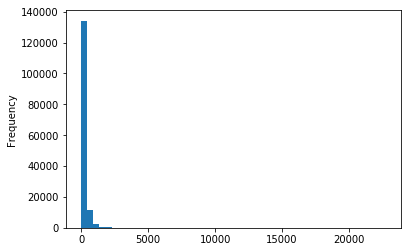

In [11]:
#checking out the overall comment length per review
reviews1['length'].plot(bins=50, kind='hist') 

In [12]:
reviews1.length.describe()

count    149910.000000
mean        203.795831
std         314.524546
min           1.000000
25%          43.000000
50%         117.000000
75%         242.000000
max       22720.000000
Name: length, dtype: float64

In [13]:
#checking out the longest review. Guy has a lot of time on his hands
reviews1[reviews1['length'] == 22720]['Consumer_Text'].iloc[0]

'SentrySafe SFW123UDC Digital Alarm Safe, X-LargePREFACEEveryone should have a home security strategy. This fire safe will play an importantrole in mine. If a fire happens in your home, you do not want to spend any time at allworrying about or gathering important possessions and papers. You just want to getout (as you should). Simply having a secure central place to deposit anything of vitalimportance means less stress all around and on many levels. You won\'t have to dealwith instances of misplacing or forgetting where something is or having it vulnerable toprying eyes or hands.This is an important purchase and it is not cheap. For that reason it is my aim in thisreview to provide a good sense of everything that there is to know about this safealong with my own impressions of it.I am providing this review based on my experience reviewing the big brother to this safe(XX-Large). The two are essentially the same other than size of course, and the includedinterior accessories. These diffe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD28B68320>,
      dtype=object)

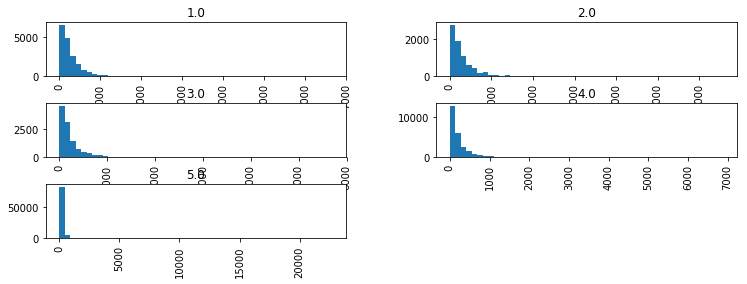

In [14]:
#generating an idea of what the word count is like based on star rating
reviews1.hist(column='length', by='Star_Rating', bins=50,figsize=(12,4))

In [15]:
# how many uniue models there are
reviews1['model'].unique().shape

(867,)

# Create Sub Dataframes based on review and model

In [15]:
#groupby model in order to get a better breakdown
reviews_joined = reviews1.groupby(['model']).agg({'Consumer_Text': lambda x: ' '.join(map(str,x))}).reset_index()
reviews_joined_bad = reviews1[reviews1['Star_Rating'] < 4]
reviews_joined_bad = reviews_joined_bad.groupby(['model']).agg({'Consumer_Text': lambda x: ' '.join(map(str,x))}).reset_index()
#bi_lem_comb_bad, tri_lem_comb_bad = len_comb_generator(reviews_joined_bad)

# NLP

In [16]:
import re

In [17]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
sno = SnowballStemmer("english")
stop = stopwords.words('english')
add = ['safe', 'lock', 'locks', 'master', 'sentry','works','keys','masterlock', 'time']
stop.extend(add)

In [19]:
import pickle
import time
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
import string

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stop]

In [34]:
review_text = reviews1['Consumer_Text']

In [35]:
reviews2 = reviews1['Consumer_Text'].apply(text_process)

In [36]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [41]:
tot_reviews_stem = reviews2.apply(lambda x : [sno.stem(y) for y in x])

In [42]:
tot_sent = tot_reviews_stem.apply(lambda x: " ".join(x))

In [43]:
tot_sent.apply(text_process)

0         [care, diamet, bottom, part, realli, big, woul...
1         [purchas, second, one, car, 15, second, switch...
2         [access, two, trailer, use, frequent, sinc, do...
3         [item, anoth, excel, exampl, pride, qualiti, p...
4         [make, multipl, trailer, differ, size, ball, m...
5         [3, set, work, great, tend, get, surfac, rust,...
6            [novel, ill, never, buy, regular, hitch, ball]
7         [bought, small, util, trailer, take, 78, ball,...
8                                             [exact, need]
9         [great, quick, easi, ball, changeov, use, ten,...
10        [alright, worri, tab, ball, corrod, think, got...
11        [ok, clip, hold, keeper, bent, first, put, bal...
12                                [nice, ball, easi, chang]
13        [use, coupl, far, work, fine, easi, switch, ba...
14        [immedi, fit, keep, cubbi, hole, use, need, ex...
15        [great, hitch, connector, accommod, differ, ba...
16        [often, tow, previous, vehicl,

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
%%time

# Might take awhile...
bow_transformer = CountVectorizer().fit(tot_sent)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

In [ ]:
text = bow_transformer.transform(review_text)

In [ ]:
print('Shape of Sparse Matrix: ', text.shape)
print('Amount of Non-Zero occurences: ',text.nnz)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text)
text_tfidf = tfidf_transformer.transform(text)
print(text_tfidf)

In [ ]:
tf = TfidfVectorizer(input=review_text, analyzer='word', ngram_range=(1,6),
                     min_df = 0, stop_words = 'english', sublinear_tf=True)
tfidf_matrix =  tf.fit_transform(corpus)

In [ ]:
reviews2 = reviews1['Consumer_Text'][2]
print(reviews2)

In [ ]:
bow4 = bow_transformer.transform([reviews2])
print(bow4)
print(bow4.shape)

In [ ]:
print(bow_transformer.get_feature_names()[31299])

In [ ]:
reviews_bow = bow_transformer.transform(reviews1['Consumer_Text'])

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
% matplotlib inline

# Peter's Code

In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
# Update puncuation list in spacy
nlp.vocab["$"].is_punct = True
nlp.vocab["|"].is_punct = True
nlp.vocab["+"].is_punct = True
nlp.vocab["<"].is_punct = True
nlp.vocab[">"].is_punct = True
nlp.vocab["="].is_punct = True
nlp.vocab["^"].is_punct = True
nlp.vocab["`"].is_punct = True
nlp.vocab["~"].is_punct = True

In [ ]:
review_txt = reviews.Consumer_Text.values

In [ ]:
import re

for idx in range(len(review_txt)):
    review_txt[idx] = re.sub(r'@([A-Za-z0-9_]+)', "", str(review_txt[idx]))

In [ ]:
for idx in range(len(review_txt)):
    review_txt[idx] = re.sub(r"(https|http)\S+", "", str(review_txt[idx]))

In [ ]:
lem = lemmatize_txt(review_txt)

# Text Processing

In [ ]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [ ]:
import pickle
import time
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#create bi-grams for text
phrases = Phrases(lem)
bigram = Phraser(phrases)
bigram_lem = list(bigram[lem])

In [ ]:
# Create tri-grams for our text
phrases2 = Phrases(bigram_lem)
trigram = Phraser(phrases2)
trigram_lem = list(trigram[bigram_lem])

In [ ]:
# Recombine full article text for unigrams, bigrams, and trigrams
uni_lem_comb = lemma_combine(lem)
bi_lem_comb = lemma_combine(bigram_lem)
tri_lem_comb = lemma_combine(trigram_lem)

In [ ]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [ ]:
def top_overall_words(text, features, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in ids. '''
    D = text
    D[D < min_tfidf] = 0 # so common words across all documents won't dominate - may remove
    tfidf_mean = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_mean, features, top_n)

In [ ]:
def tfidf_generator(lem_comb):
    tfidf = TfidfVectorizer(min_df = 0.001, max_df = 0.75)
    text_tfidf = tfidf.fit_transform(lem_comb)
    dense_text = text_tfidf.todense()
    dense_text2 = np.squeeze(np.asarray(dense_text))
    features = tfidf.get_feature_names()
    return top_overall_words(dense_text2, features)

In [ ]:
bi_lem, tri_lem = len_comb_generator(reviews_barska)

In [ ]:
bi_barska = tfidf_generator(bi_lem_comb_barska)
plt.figure(figsize=(12,6))
bi_barska.sort_values(by = 'tfidf', ascending=True).plot.barh(x ='feature')